변수 3개(하나는 범주형, 두개는 수치형 연속변수)의 이원분산분석을 수행하고 통계표를 작성하시오.

In [1]:
import pandas as pd
import numpy as np

avocado = pd.read_csv('avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [2]:
avocado = avocado[['AveragePrice','type','region']]
avocado = avocado[(avocado['region'] == 'Orlando') | 
                  (avocado['region'] == 'Boston') |
                  (avocado['region'] == 'Chicago')].reset_index(drop=True)
avocado

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


가정1 : 집단의 측정치는 서로 독립적이며, 정규분포를 따른다.


가정2 : 집단 측정치의 분산은 같다(등분산)

귀무가설1 : a와 b변수의 교호작용은 없다. / 대립가설 1 : a와 b변수의 교호작용이 있다. 


귀무가설2 : a변수에 따른 종속변수의 값에는 차이가 없다. / 대립가설 2 : a변수에 따른 종속변수의 값에는 차이가 있다. 


귀무가설3 : b변수에 따른 종속변수의 값에는 차이가 없다. / 대립가설 3 : b변수에 따른 종속변수의 값에는 차이가 있다. 

In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~ C(type) + C(region) + C(type):C(region)'
model = ols(formula,avocado).fit()
aov_table = anova_lm(model,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(type),1.0,56.111007,56.111007,828.218296,1.989417e-133
C(region),2.0,0.432136,0.216068,3.189242,4.161918e-02
C(type):C(region),2.0,1.878817,0.939409,13.866003,1.146622e-06
Residual,1008.0,68.291047,0.067749,NaN,NaN


type, region, type:region 세 변수 모두 p-value값이 0.05보다작아 모든 귀무가설을 기각한다. 
따라서 type, region 변수 모두 종속변수의 값에 영향을 주며, 두 변수 사이에 교호작요이 존재한다고 판단한다.  

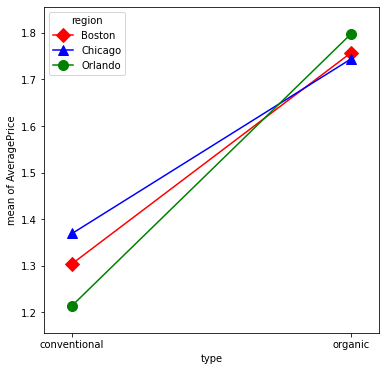

In [7]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

type = avocado['type']
region = avocado['region']
averageprice = avocado['AveragePrice']


fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(x = type, trace = region,response = averageprice,
                       colors=['red','blue','green'],
                       markers=['D','^','o'],
                       ms=10, ax=ax)